Sascompetitions (http://sascompetitions.ru/) published an online data analysis competition. <br>
The main goal of the participants was to build a behavioral model of buyers to predict the probability of order cancellation. <br>
Data was collected and provided by an online hypermarket "Utkonos" (https://www.utkonos.ru/info/about) that supplies home delivery of groceries.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('train.csv', encoding = "windows-1251", low_memory=False)

### Data structure:
Date - planned delivery date to the customer.<br>
DateOrder - order date.<br>
ClientID - unique client identifier.<br>
ChannelID - distribution channel.<br>
OrderID - order identifier generated by the site.<br>
MaterialID - material identifier.<br>
GroupID - purchase group identifier.<br>
DeliveryType - delivery type.<br>
Cluster - delivery cluster.<br>
Interval - delivery time interval (from N to M hours).<br>
CancelFlag - order cancellation label **[target variable]**.<br>
OrderCnt - number of ordered pieces.<br>
Prepay - prepayment.<br>
Count_edit - the number of edits of the customer order, 1 (initial order) increases with the number of edits.<br>

In [3]:
df.head()

,Interval,Date,OrderDate,ClientID,ChannelID,OrderID,MaterialID,GroupID,Cluster,CancelFlag,OrderCnt,DeliveryType,prepay,count_edit
0,14-16.,03/10/2018,02/10/2018,93808186,2,90102063002,3328810.0,61.0,NaN,0,1.0,Обычная доставка,0,1
1,14-16.,03/10/2018,02/10/2018,93808186,2,90102063002,3281258.0,30.0,NaN,0,2.0,Обычная доставка,0,1
2,14-16.,03/10/2018,02/10/2018,93808186,2,90102063002,3210734.0,10.0,NaN,0,1.0,Обычная доставка,0,1
3,14-16.,03/10/2018,02/10/2018,93808186,2,90102063002,3328848.0,61.0,NaN,0,2.0,Обычная доставка,0,1
4,12-14.,07/10/2018,05/10/2018,94112406,2,90102091007,3347801.0,17.0,NaN,0,10.0,Обычная доставка,0,1


In [4]:
df.tail()

,Interval,Date,OrderDate,ClientID,ChannelID,OrderID,MaterialID,GroupID,Cluster,CancelFlag,OrderCnt,DeliveryType,prepay,count_edit
9023179,8-10.,31/12/2018,30/12/2018,93114842,2,98357281213,3288611.0,35.0,HUB5,0,5.0,Обычная доставка,0,1
9023180,8-10.,31/12/2018,30/12/2018,93114842,2,98357281213,3141534.0,35.0,HUB5,0,1.0,Обычная доставка,0,1
9023181,8-10.,31/12/2018,30/12/2018,93114842,2,98357281213,3323302.0,36.0,HUB5,0,2.0,Обычная доставка,0,1
9023182,8-10.,31/12/2018,30/12/2018,93114842,2,98357281213,3051490.0,36.0,HUB5,0,1.0,Обычная доставка,0,1
9023183,8-10.,31/12/2018,30/12/2018,93114842,2,98357281213,3189794.0,29.0,HUB5,0,5.0,Обычная доставка,0,1


Given rows were collected for the past 2 months. It makes sense to test algorithms on the latest data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9023184 entries, 0 to 9023183
Data columns (total 14 columns):
Interval        object
Date            object
OrderDate       object
ClientID        int64
ChannelID       int64
OrderID         int64
MaterialID      float64
GroupID         float64
Cluster         object
CancelFlag      int64
OrderCnt        float64
DeliveryType    object
prepay          int64
count_edit      int64
dtypes: float64(3), int64(6), object(5)
memory usage: 963.8+ MB


In [6]:
df.describe()

,ClientID,ChannelID,OrderID,MaterialID,GroupID,CancelFlag,OrderCnt,prepay,count_edit
count,9.023184e+06,9.023184e+06,9.023184e+06,9.023079e+06,9.023079e+06,9.023184e+06,9.023079e+06,9.023184e+06,9.023184e+06
mean,8.477533e+07,2.421724e+00,9.835259e+10,3.087161e+06,2.753640e+01,5.586831e-02,1.812923e+00,1.965552e-01,1.755423e+00
std,2.626992e+07,2.128911e+00,1.599291e+08,3.881549e+05,1.263016e+01,2.296672e-01,2.838032e+00,3.973931e-01,4.189950e+00
min,9.000000e+01,2.000000e+00,9.010206e+10,2.001730e+06,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,9.148547e+07,2.000000e+00,9.835495e+10,3.070512e+06,1.700000e+01,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
50%,9.319370e+07,2.000000e+00,9.835565e+10,3.226592e+06,2.800000e+01,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
75%,9.370941e+07,2.000000e+00,9.835644e+10,3.306585e+06,3.500000e+01,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00
max,1.000005e+08,1.700000e+01,9.835728e+10,3.363341e+06,6.600000e+01,1.000000e+00,9.600000e+02,1.000000e+00,4.070000e+02


In [7]:
df.isna().sum()

Interval              0
Date                  0
OrderDate             0
ClientID              0
ChannelID             0
OrderID               0
MaterialID          105
GroupID             105
Cluster         5672068
CancelFlag            0
OrderCnt            105
DeliveryType          0
prepay                0
count_edit            0
dtype: int64

## Exploratory data analysis

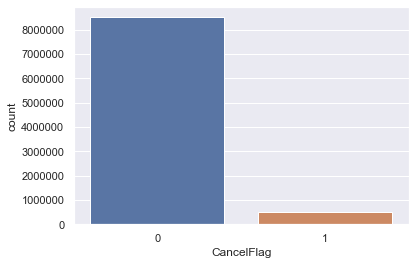

In [8]:
sns.countplot(x='CancelFlag', data=df);

Our target variable is imbalanced. To adjust the class distribution of a data set there are some oversampling and undersampling techniques.

In [9]:
def unique_describe(df, columns):
    for col in columns:
        print("Column: {} \n Values: {} \n Sum: {} \n".format(col, df[col].unique(), df[col].nunique()))      

In [10]:
unique_describe(df, ['MaterialID', 'Interval', 'Cluster', 'DeliveryType', 'GroupID', 'ChannelID'])

Column: MaterialID 
 Values: [3328810. 3281258. 3210734. ... 3363312. 3363325. 3363319.] 
 Sum: 51082 

Column: Interval 
 Values: ['14-16.' '12-14.' '19-21.' '22-0.' '10-18.' '18-20.' '22-2.' '20-22.'
 '16-18.' '21-23.' '10-12.' '8-10.' '6-8.' '6-14.' '0-2.' '19-23.'
 '22-23.' '20-21.' '21-22.' '10-14.' '8-13.' '10-16.' '13-18.' '15-17.'
 '14-17.' '8-14.' '19-20.' '16-22.' '8-18.' '9-16.'] 
 Sum: 30 

Column: Cluster 
 Values: [nan 'HUB17' 'HUB6' 'HUB5' 'HUB13' 'HUB9' 'HUB2' 'HUB20' 'HUB7' 'HUB15'
 'HUB11' 'HUB4' 'HUB8' 'HUB22' 'HUB21' 'HUB10' 'HUB12' 'HUB1' 'HUB16'
 'HUB19' 'HUB14' 'HUB3' 'HUB18' 'ZON1'] 
 Sum: 23 

Column: DeliveryType 
 Values: ['Обычная доставка' 'Доставка День в День'] 
 Sum: 2 

Column: GroupID 
 Values: [61. 30. 10. 17. 11. 63. 23.  5. 13. 35. 19. 15. 21. 16. 20. 36. 12. 18.
 34. 31. 24.  9. 14. 42. 22. 28. 33. 26. 29.  7. 66. 32. 46. 59. 41. 55.
 48. 53.  6.  1. 38.  8.  2. nan  3.  4. 27. 40. 39.] 
 Sum: 48 

Column: ChannelID 
 Values: [ 2 15  8 16 17] 
 Sum

Seems like **MaterialID** column contains no generalized data.

In [11]:
delivery_dict = {'Обычная доставка':'Standard delivery', 'Доставка День в День':'One-day rush delivery'}

# The values 'Обычная доставка' and 'Доставка День в День' are replaced with english equivalent
df['DeliveryType'].replace(delivery_dict, inplace=True)

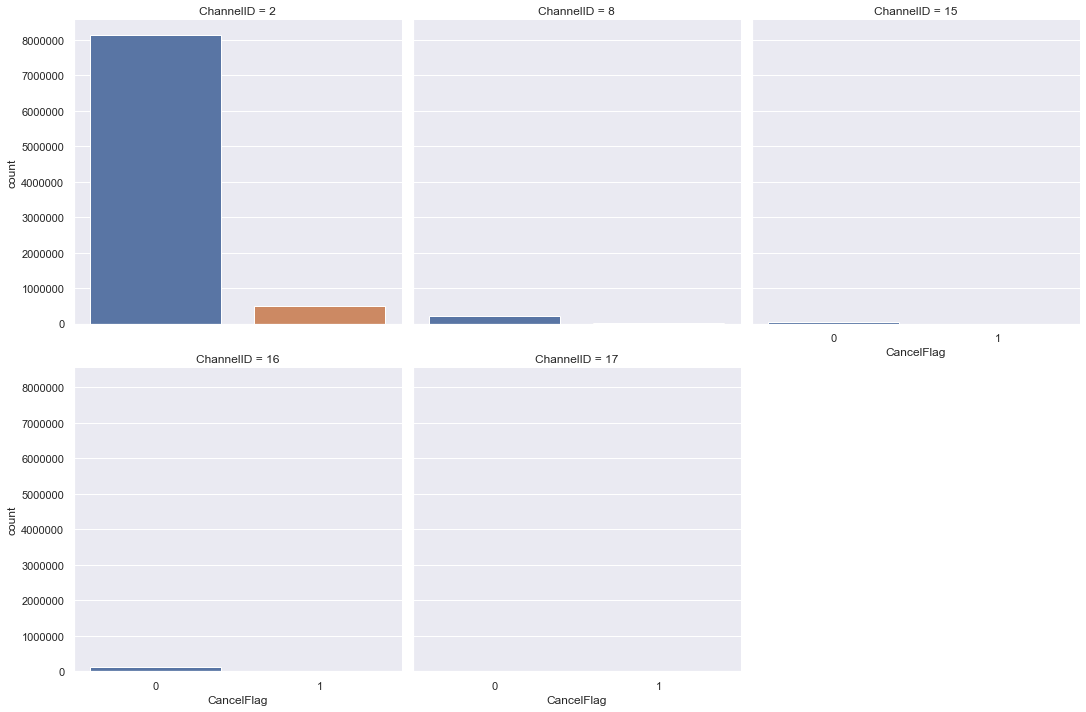

In [12]:
plot_channel_cancel = sns.catplot(x="CancelFlag", col="ChannelID", col_wrap=3, data=df, kind="count")

**ChannelID = 2** increases chances of rejection among customers.

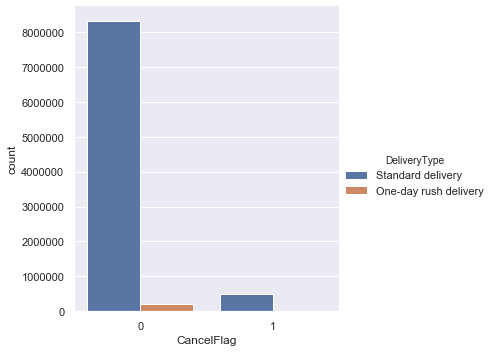

In [13]:
plot_delivery_cancel = sns.catplot(x="CancelFlag", hue="DeliveryType", data=df, kind="count")

Only **One-day rush delivery** contains order cancellation labels.

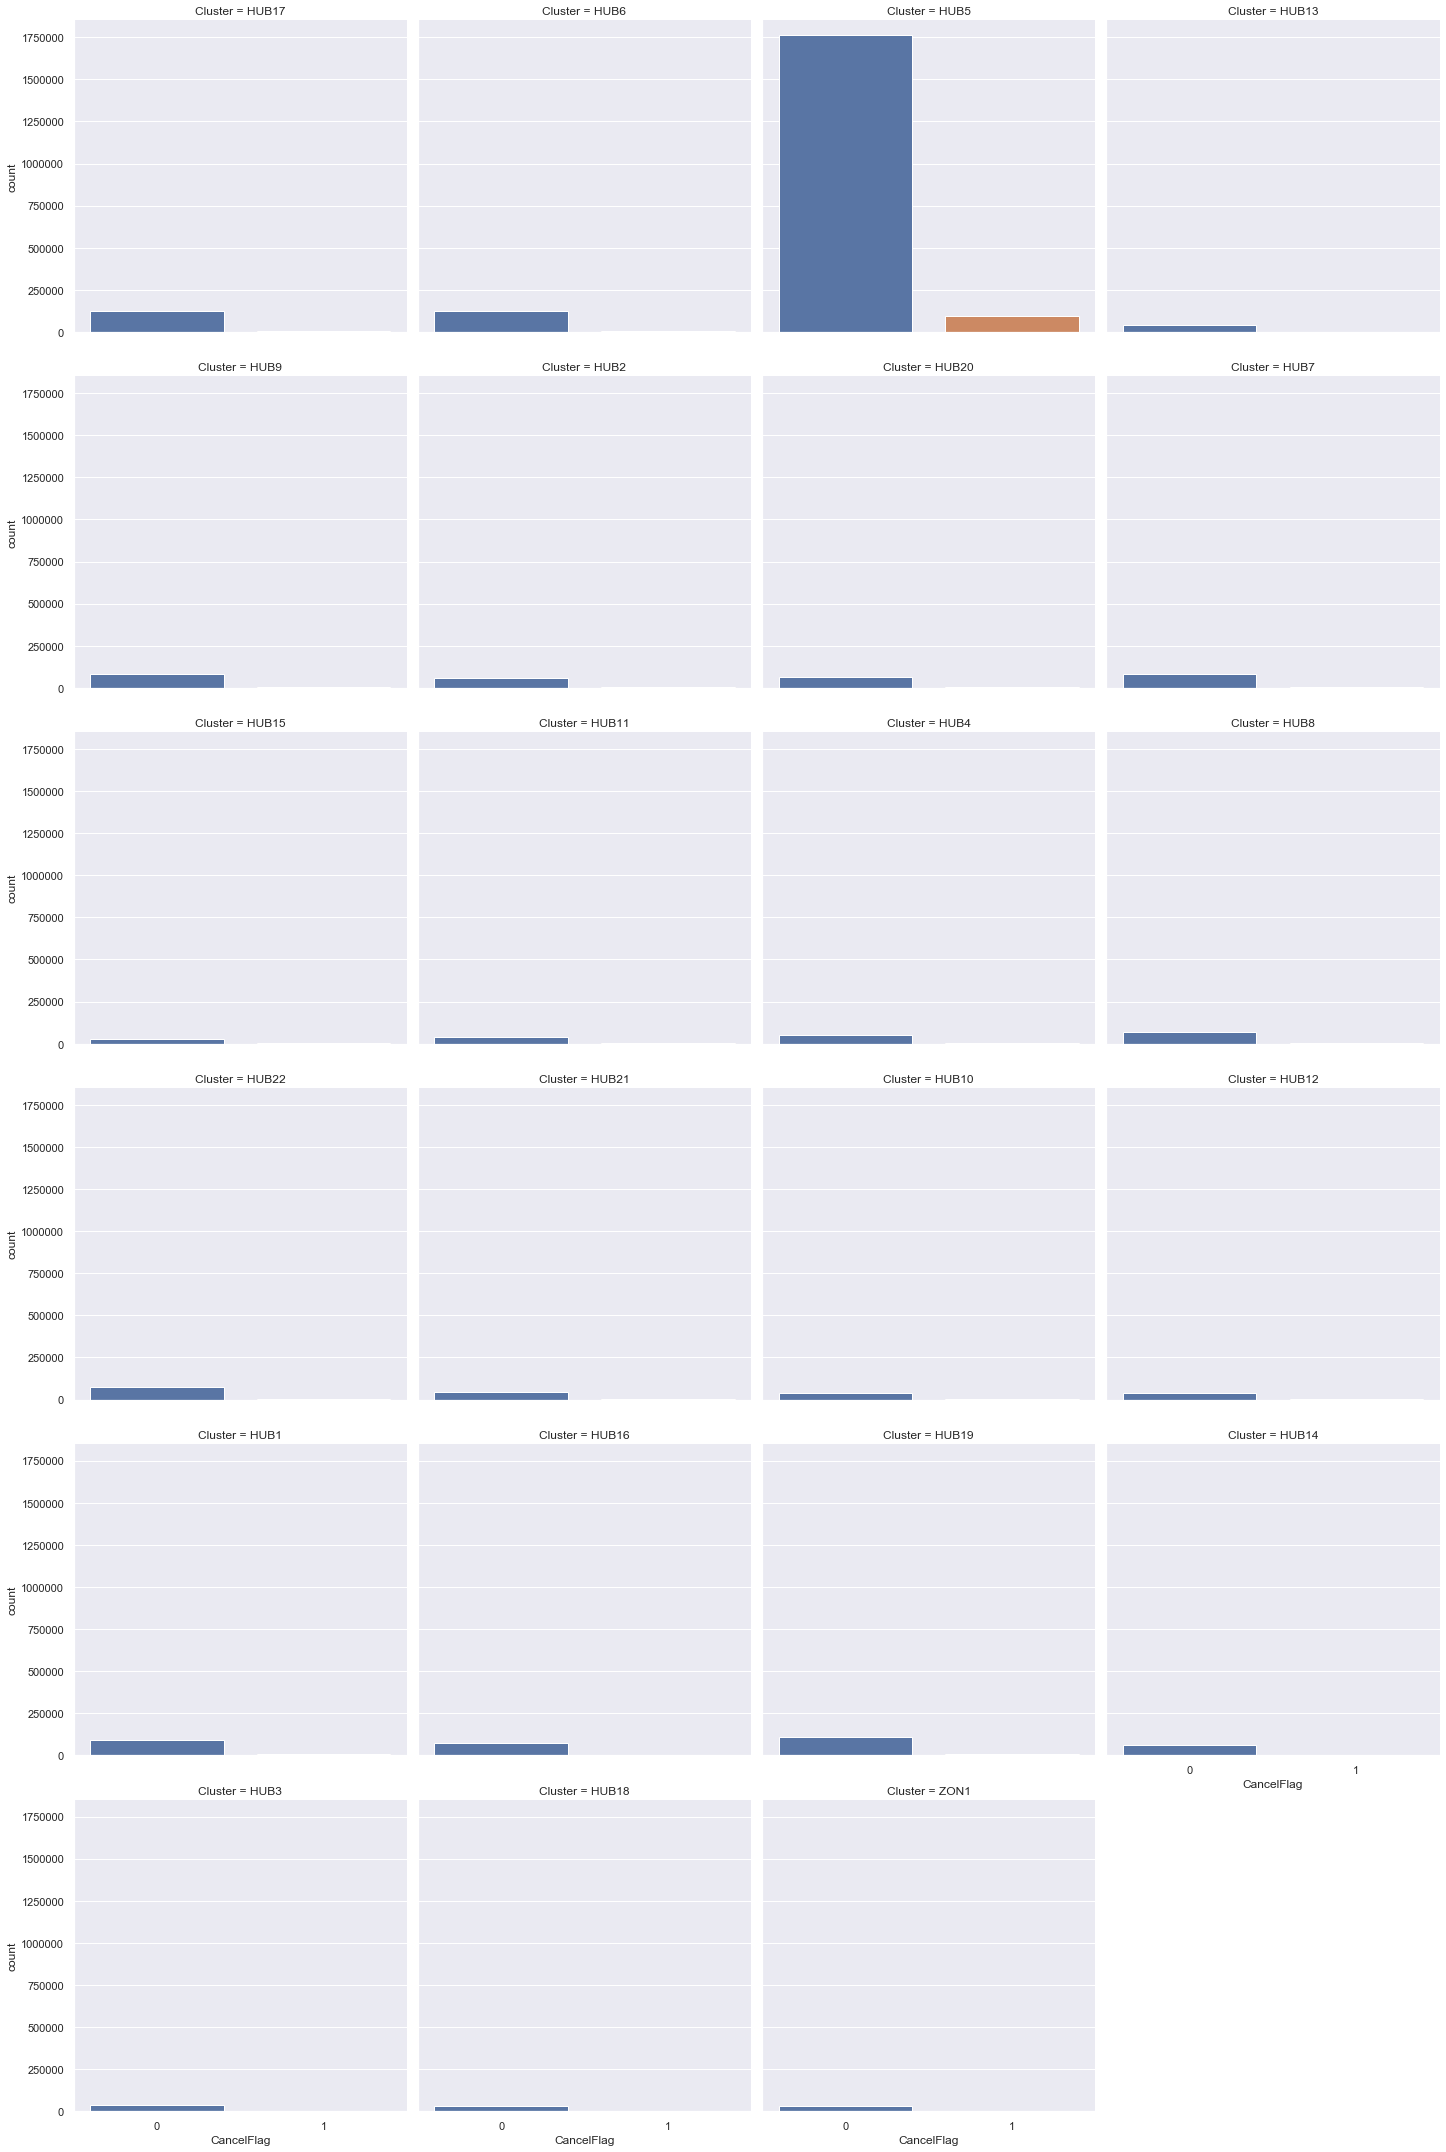

In [14]:
plot_cluster_cancel = sns.catplot(x="CancelFlag", col="Cluster", col_wrap=4, data=df.dropna(), kind="count")

Only **HUB20** contains order cancellation labels.

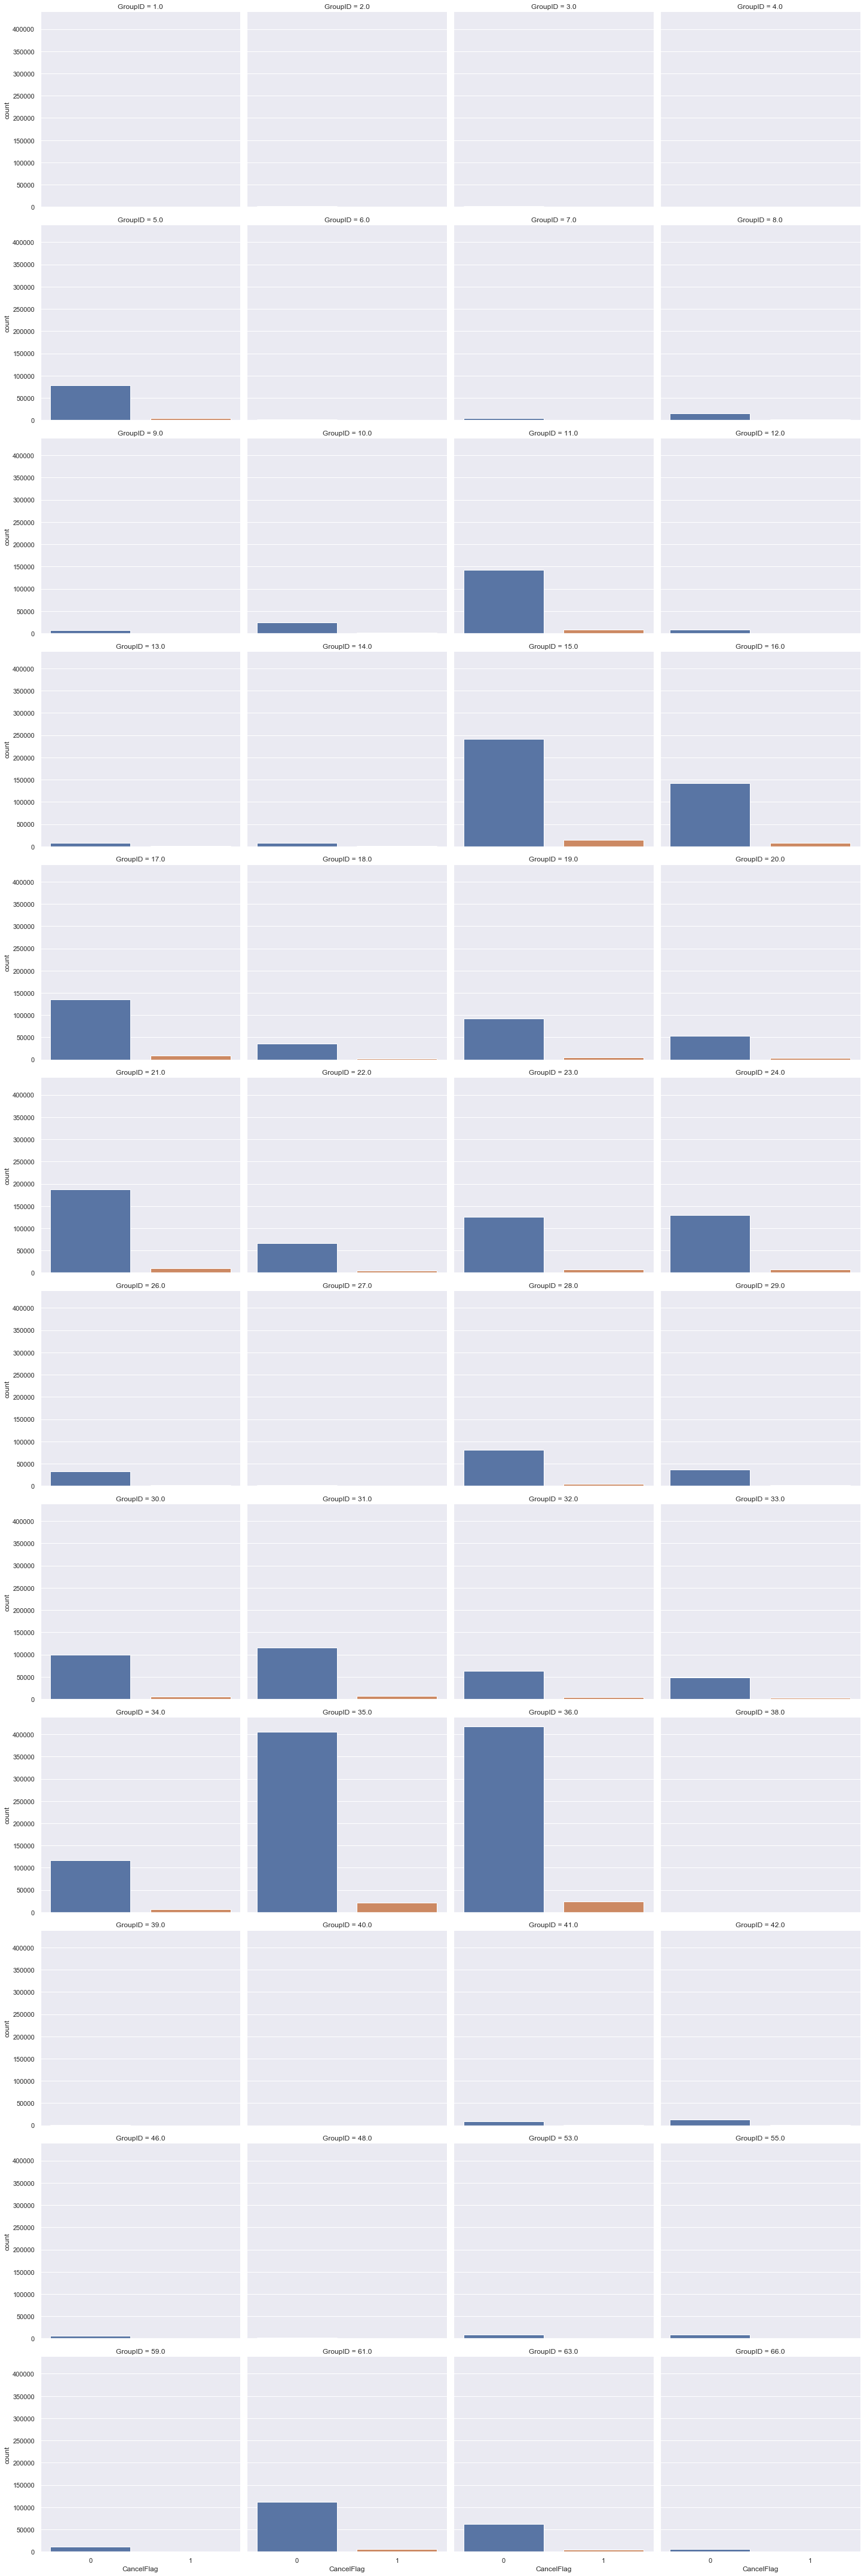

In [15]:
plot_group_cancel = sns.catplot(x="CancelFlag", col="GroupID", col_wrap=4, data=df.dropna(), kind="count")

Most of canceled orders belongs to **GroupID = 35** and **GroupID = 36**, same as most non-canceled orders. Proportion of CancelFlag = 0 to CancelFlag = 1 for most GroupIDs tend to be the same.  

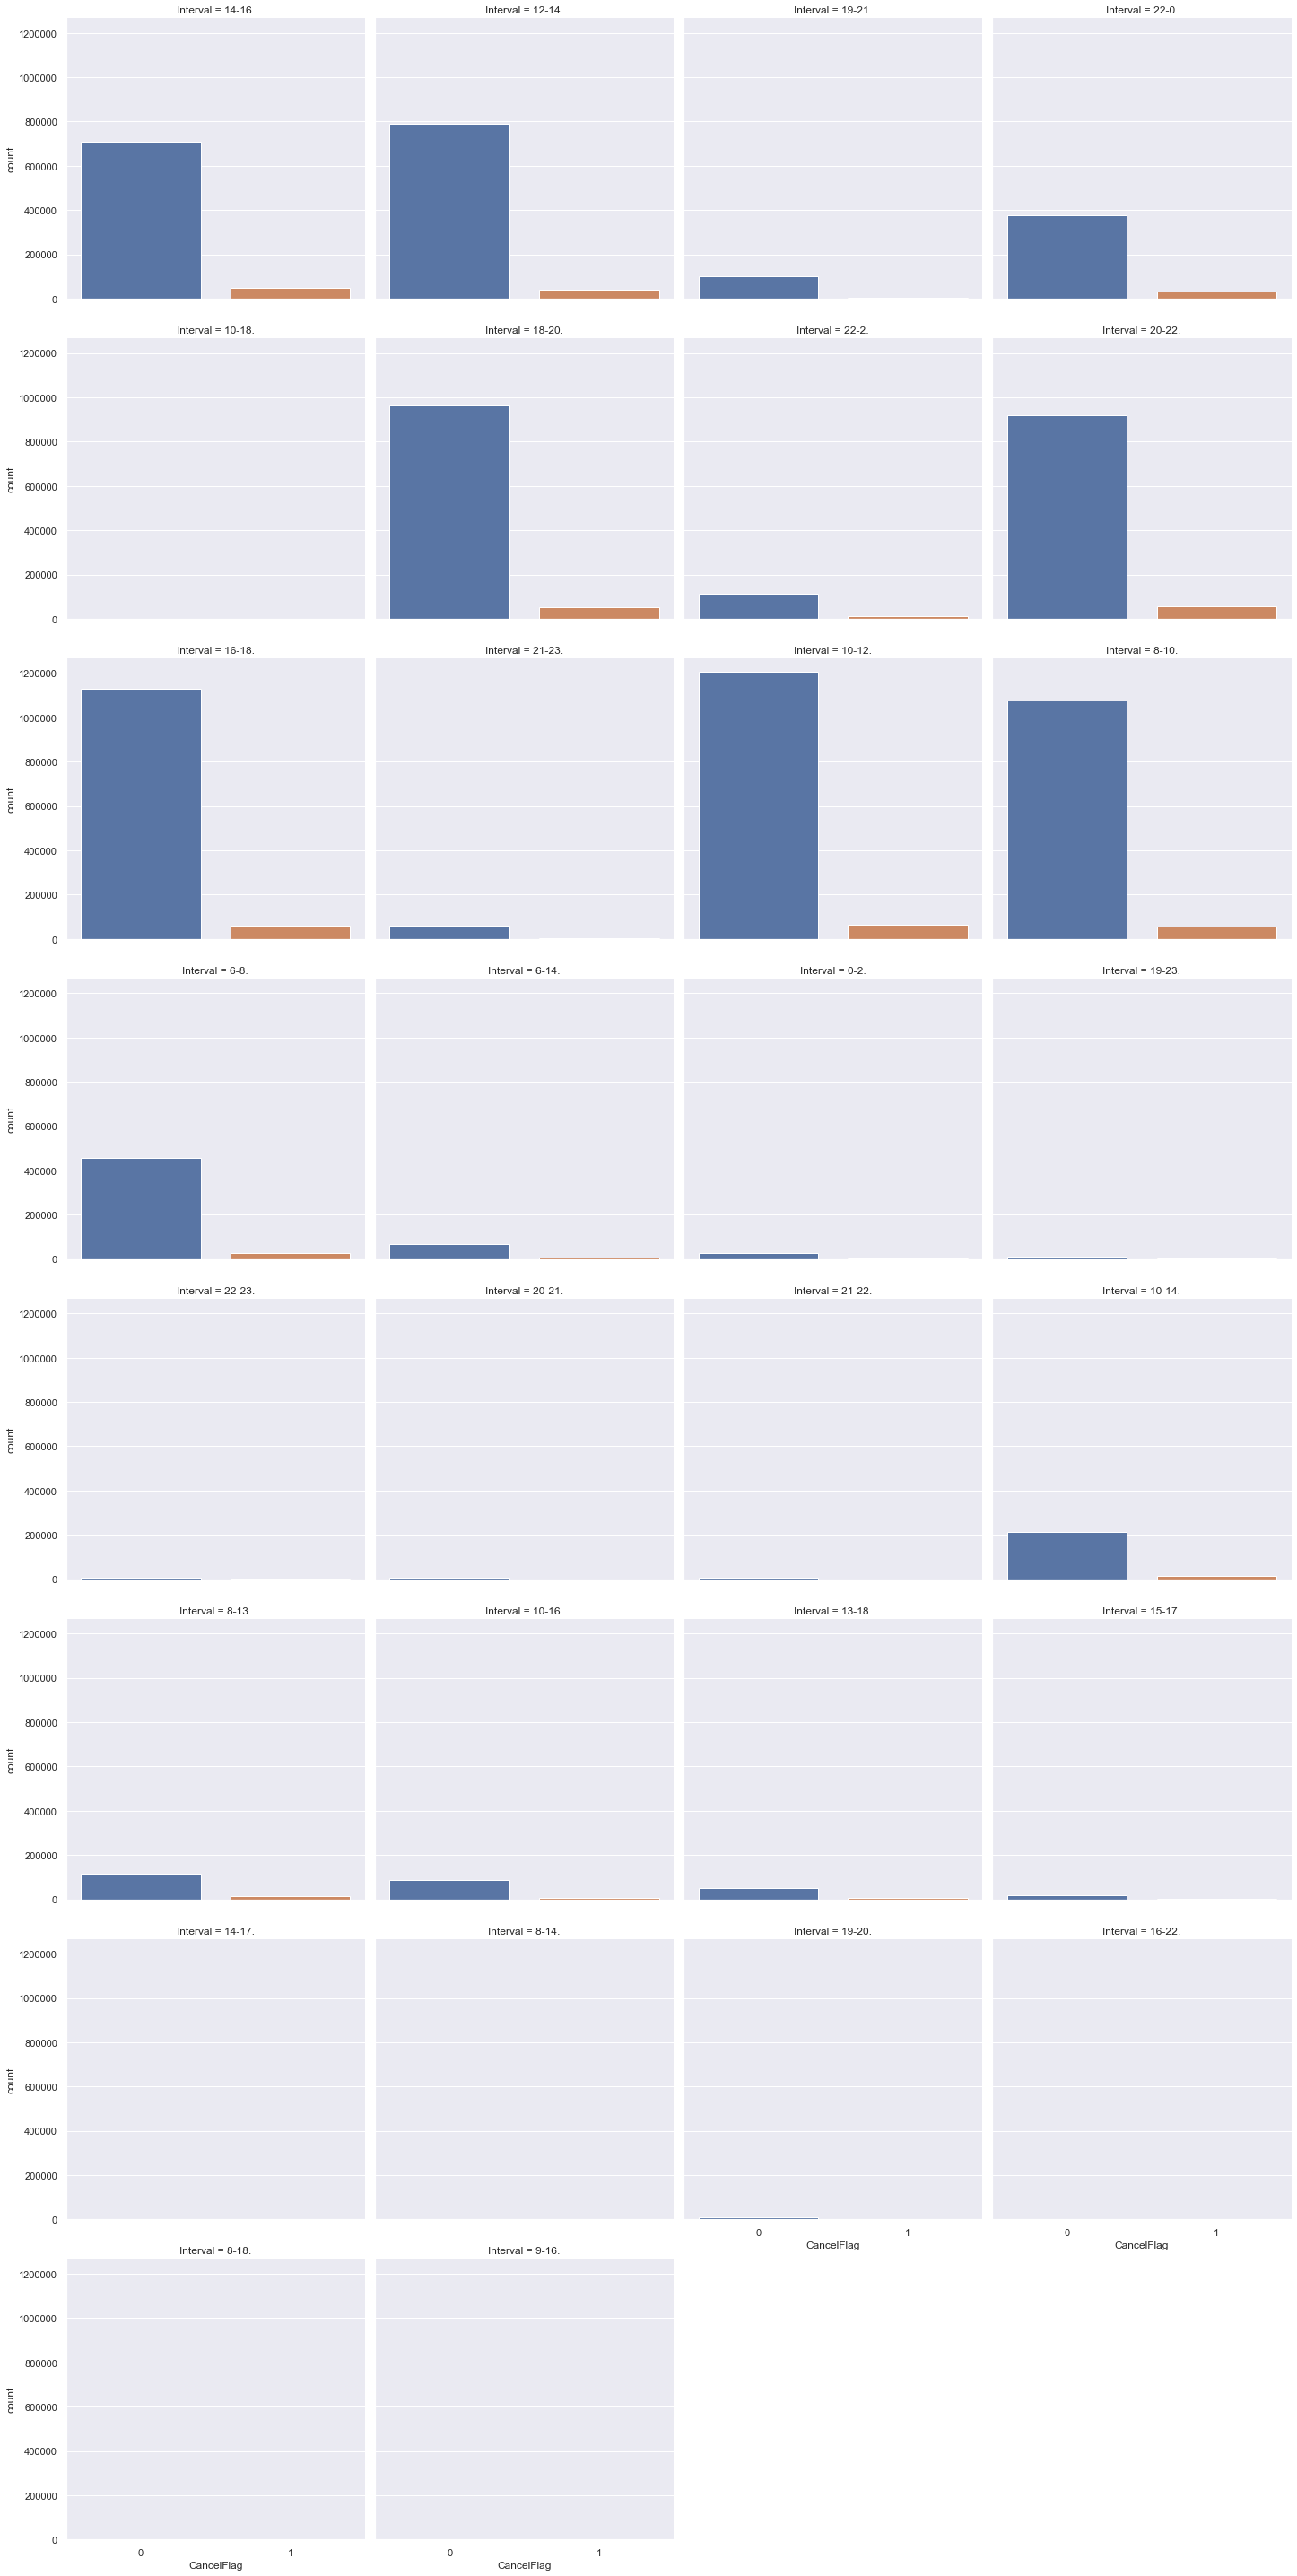

In [16]:
plot_interval_cancel = sns.catplot(x="CancelFlag", col="Interval", col_wrap=4, data=df, kind="count")

Such intervals as: 14-16, 12-14, 22-0, 18-20, 20-22, 16-18, 10-12, 8-10 contain enough cancellations. It is necessary to split time intervals for more detailed examination. 

In [17]:
df['Interval'] = df['Interval'].str.replace('.', "")
df[['IntervalFrom', 'IntervalTo']] = df['Interval'].str.split('-', expand=True)

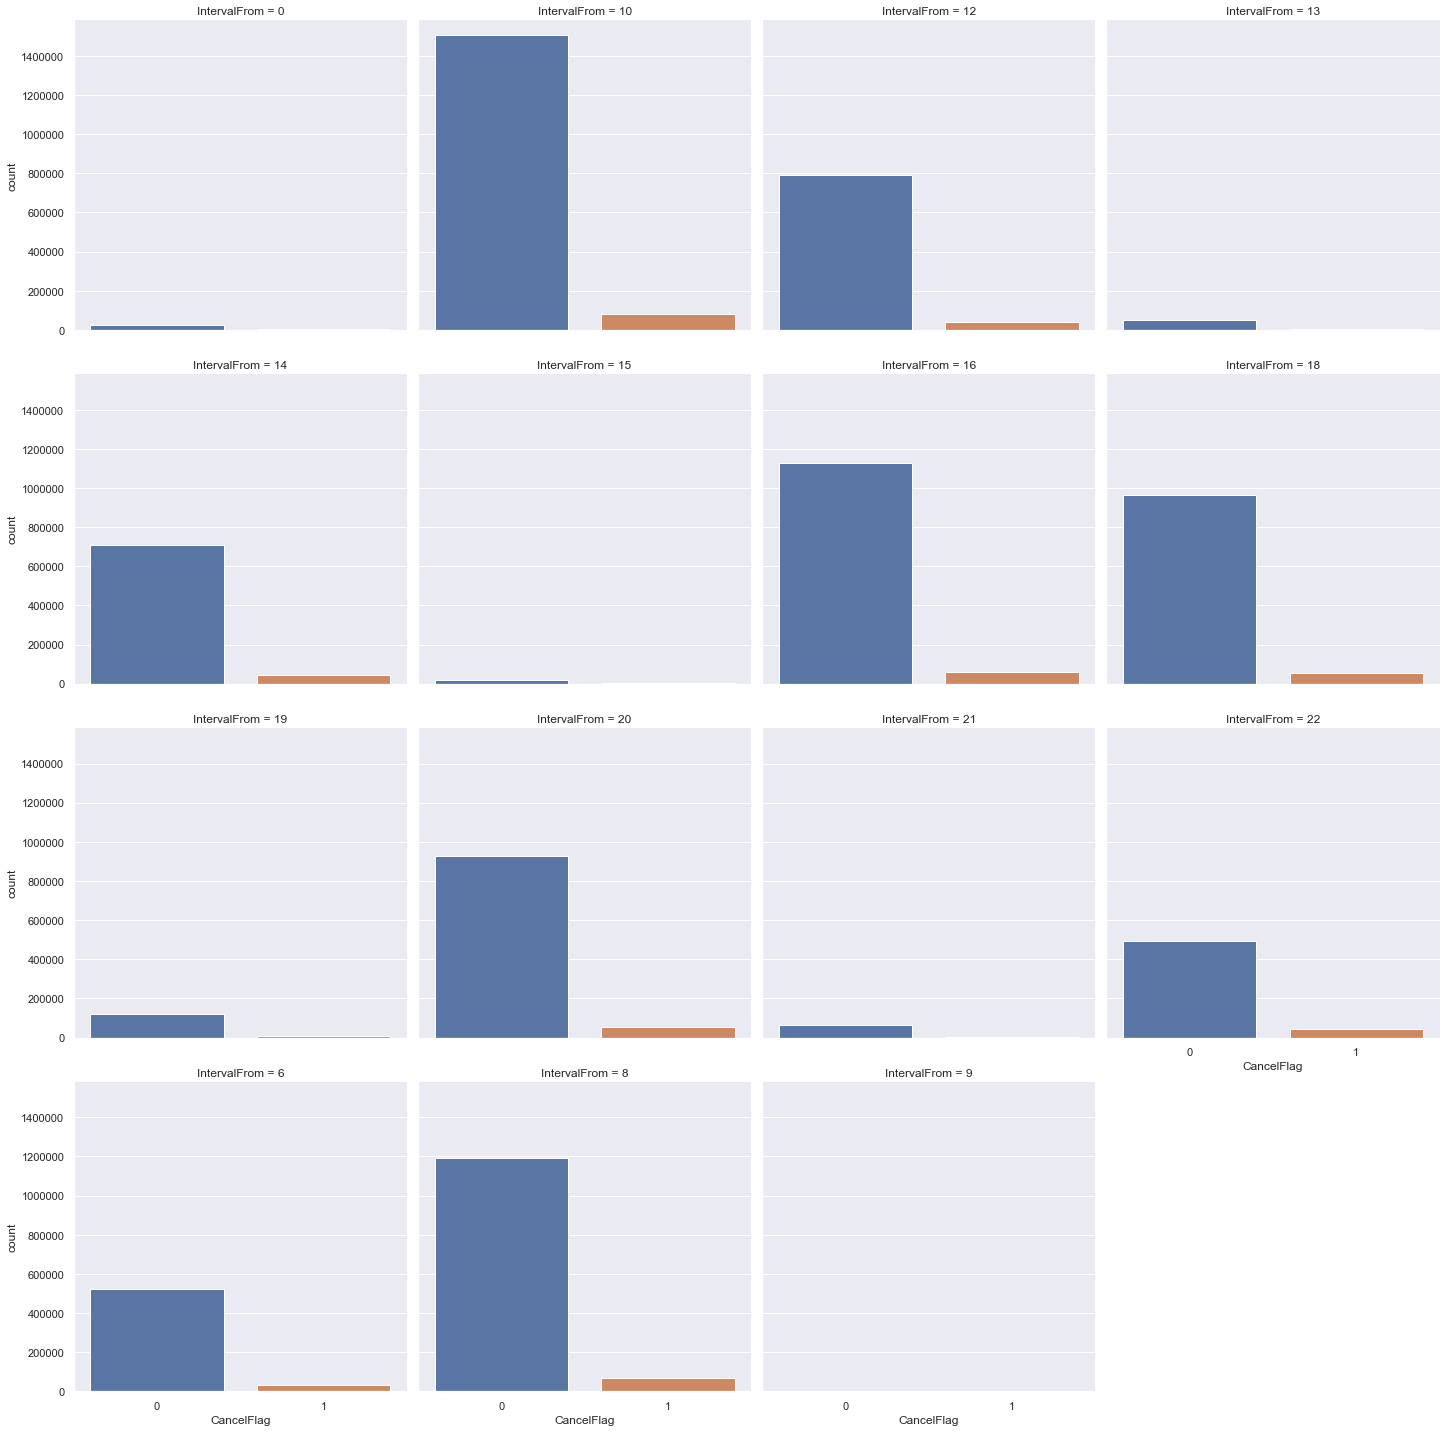

In [18]:
plot_intervalfrom_cancel = sns.catplot(x="CancelFlag", col="IntervalFrom", col_wrap=4, data=df, kind="count")

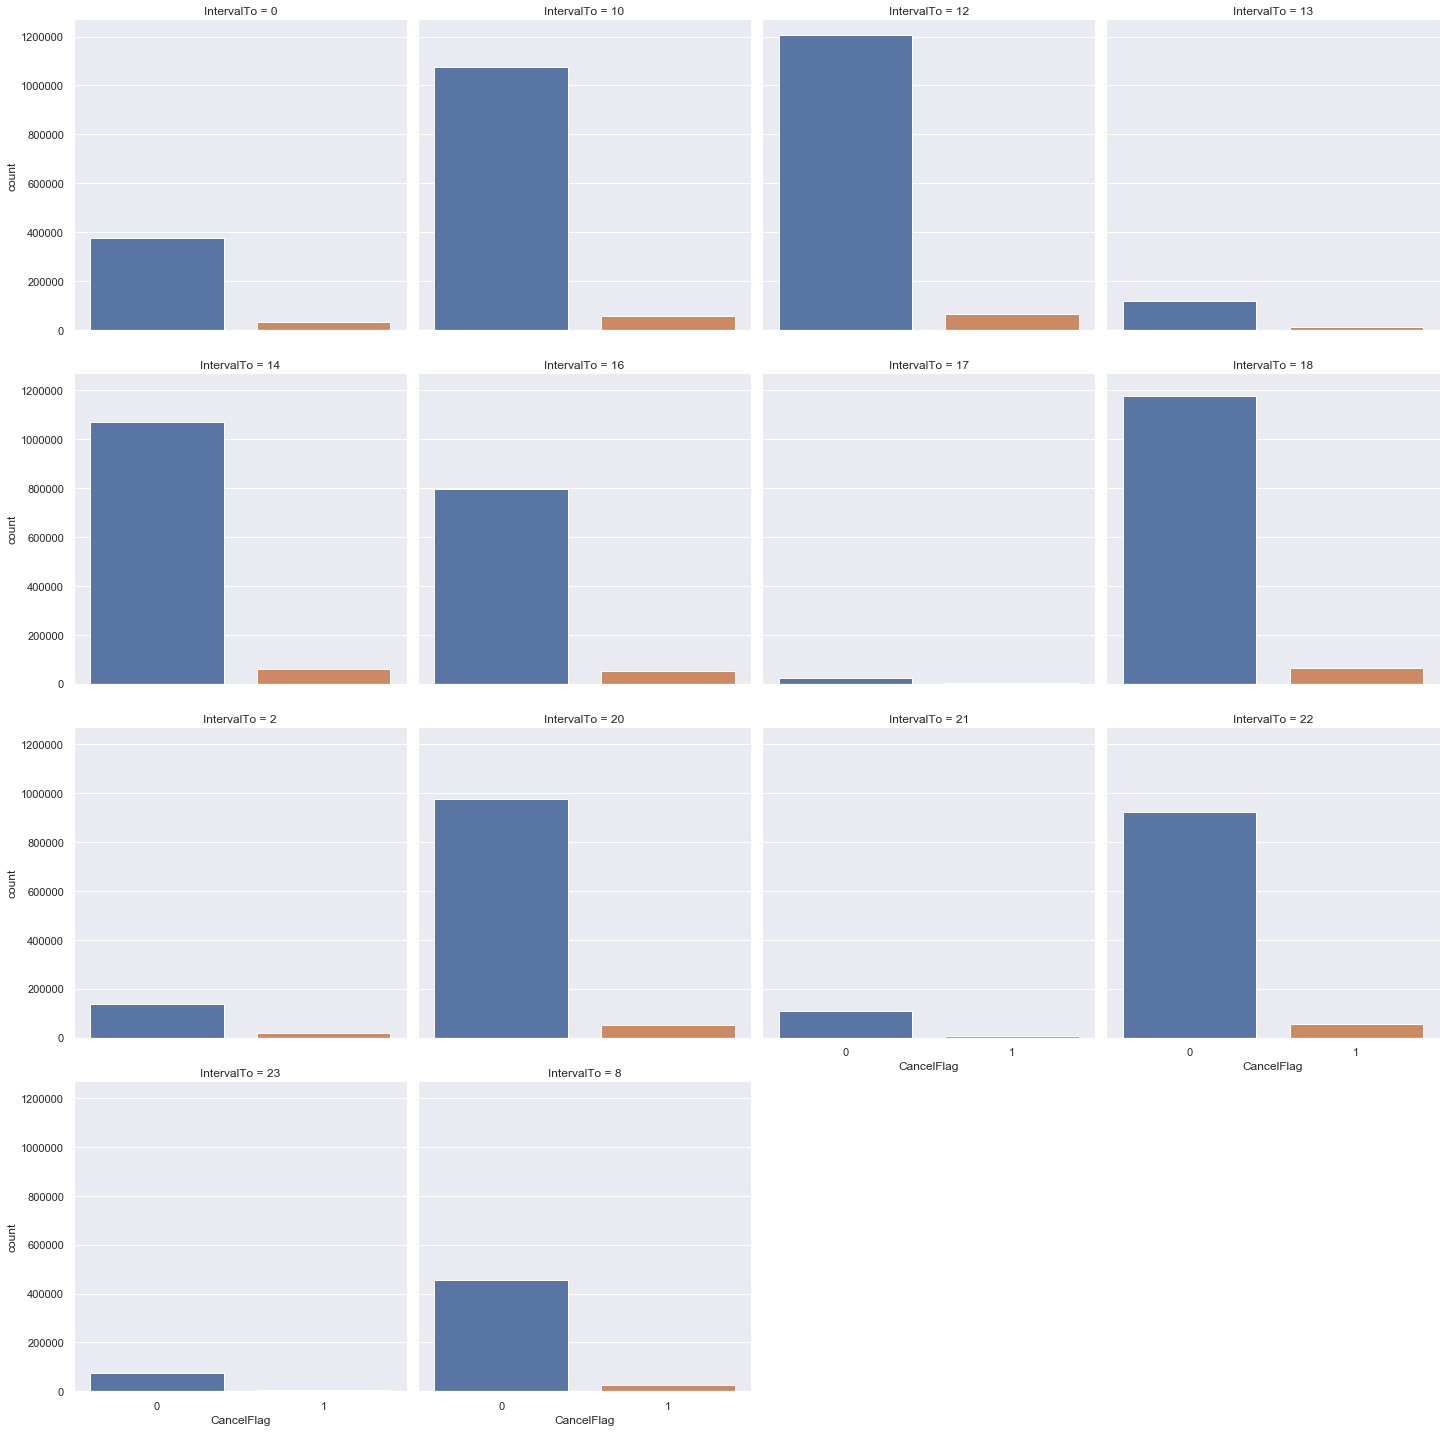

In [19]:
plot_intervalto_cancel = sns.catplot(x="CancelFlag", col="IntervalTo", col_wrap=4, data=df, kind="count")

No hidden dependencies were noticed with splitted time intervals.

In [20]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [21]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format="%d/%m/%Y")

In [22]:
df['DeltaDays'] = (df['Date'] - df['OrderDate']).dt.days

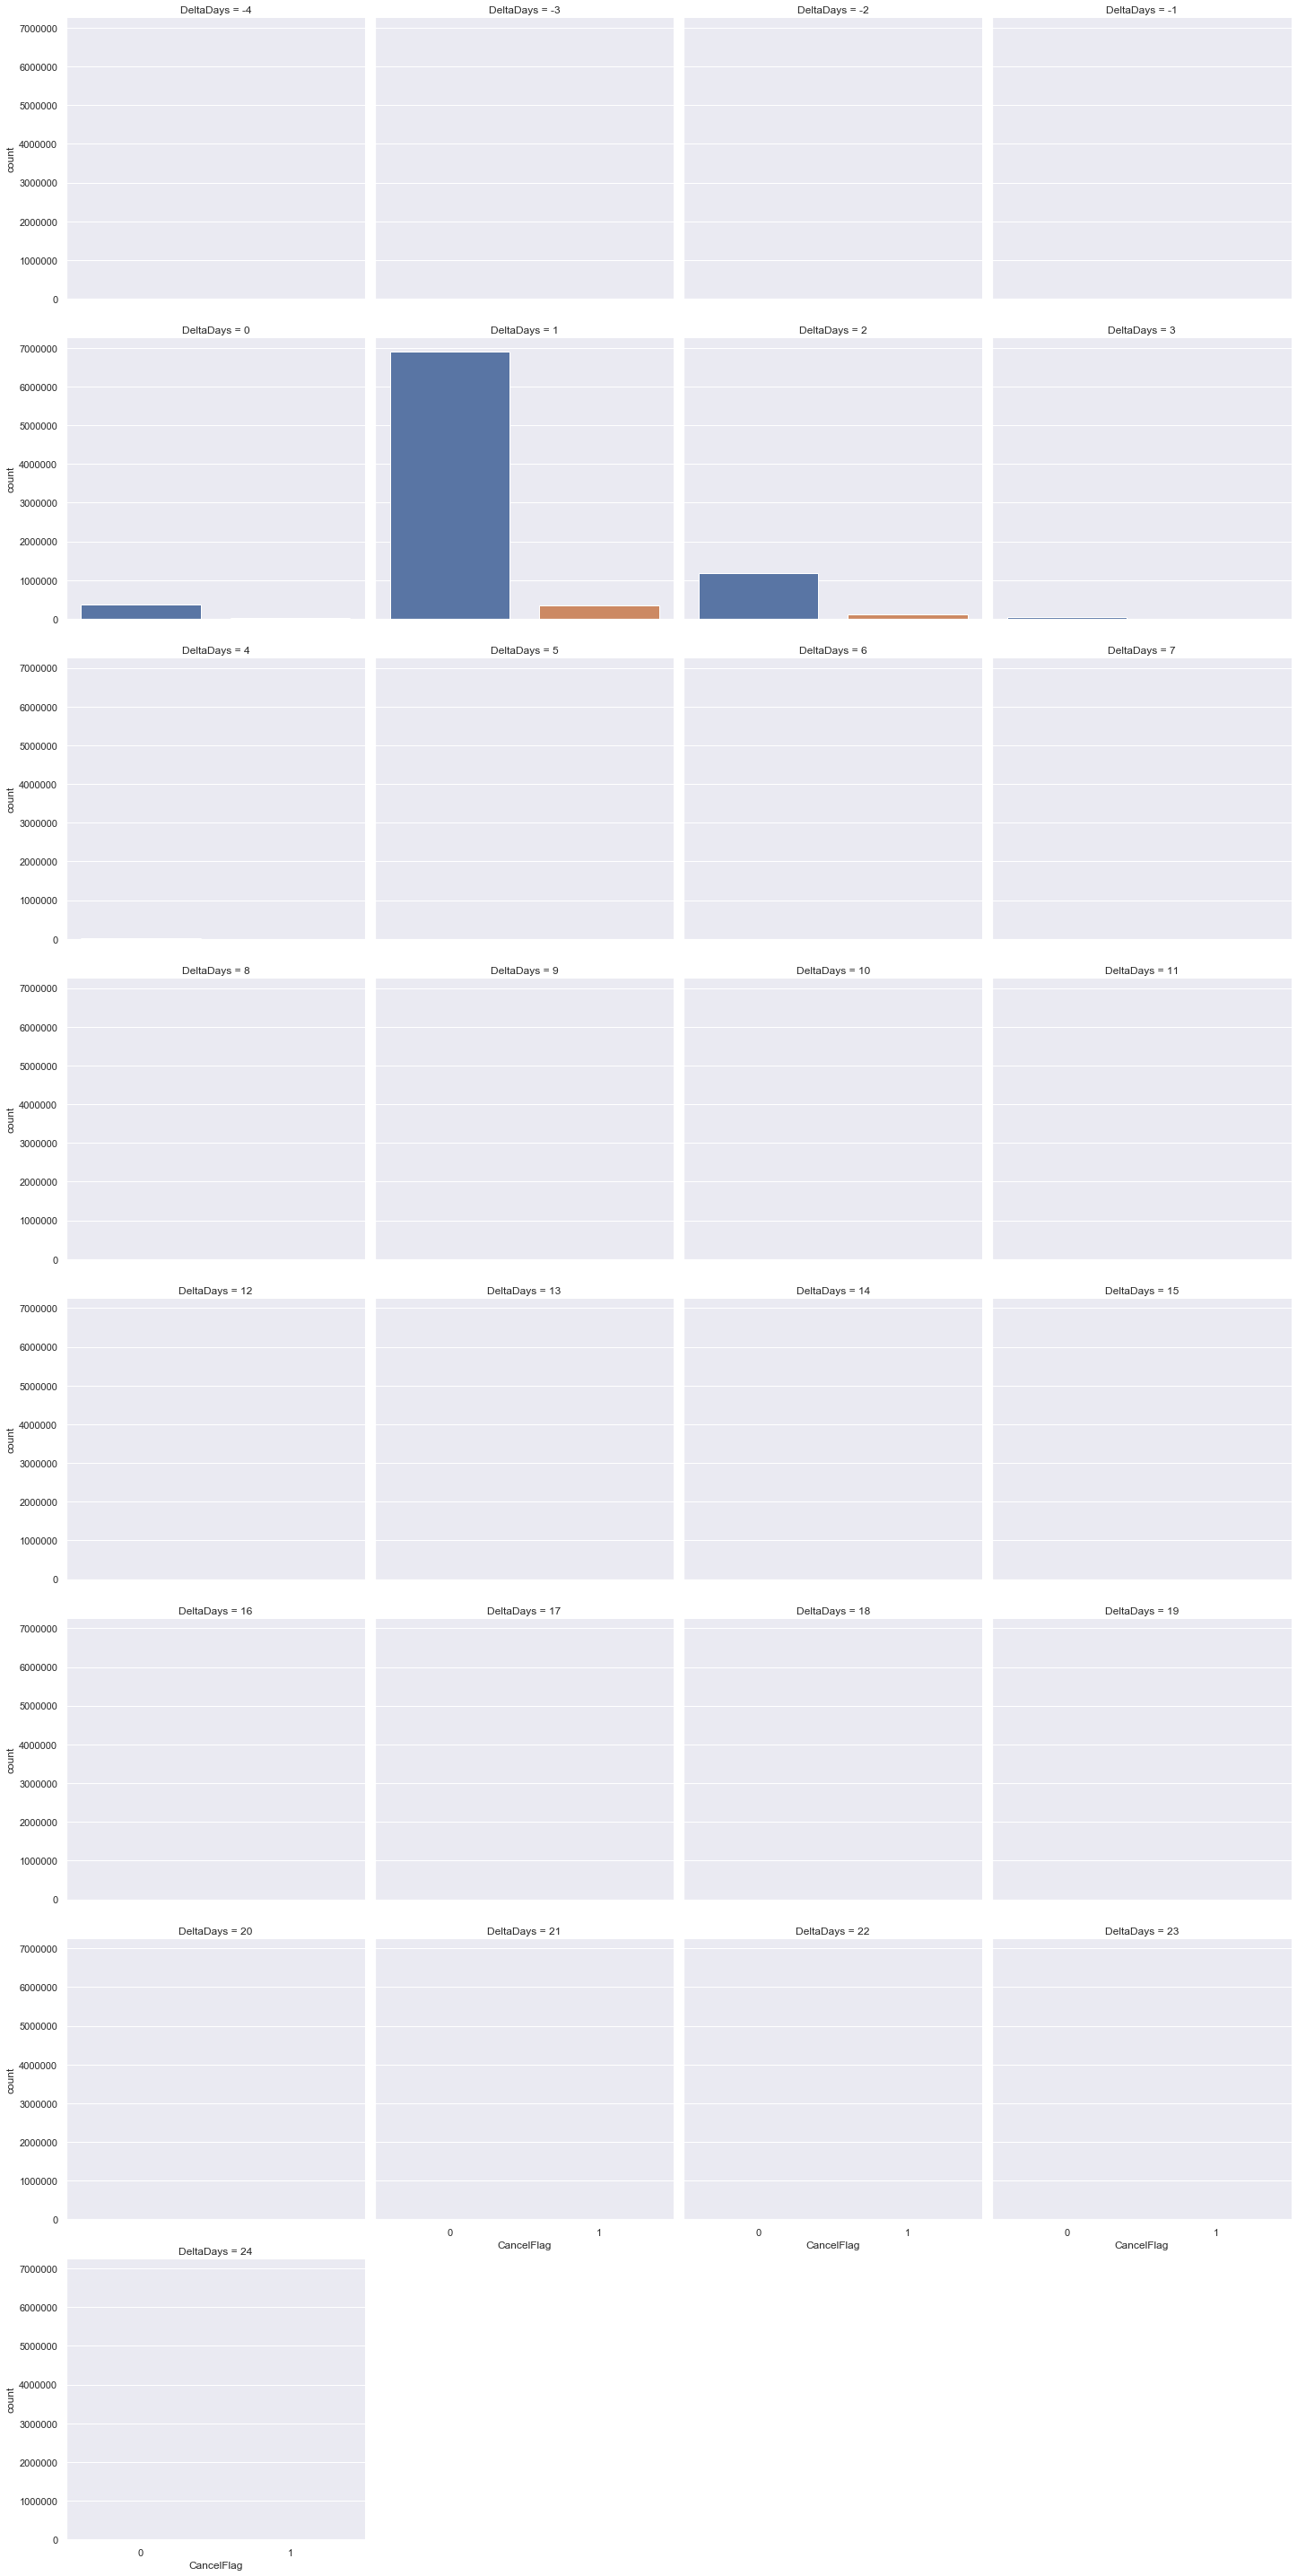

In [23]:
plot_deltadays_cancel = sns.catplot(x="CancelFlag", col="DeltaDays", col_wrap=4, data=df, kind="count")

As the number of days between order and delivery increses, the number of refusals decreases.

In [24]:
df['OrderWeekday'] = df['OrderDate'].dt.dayofweek

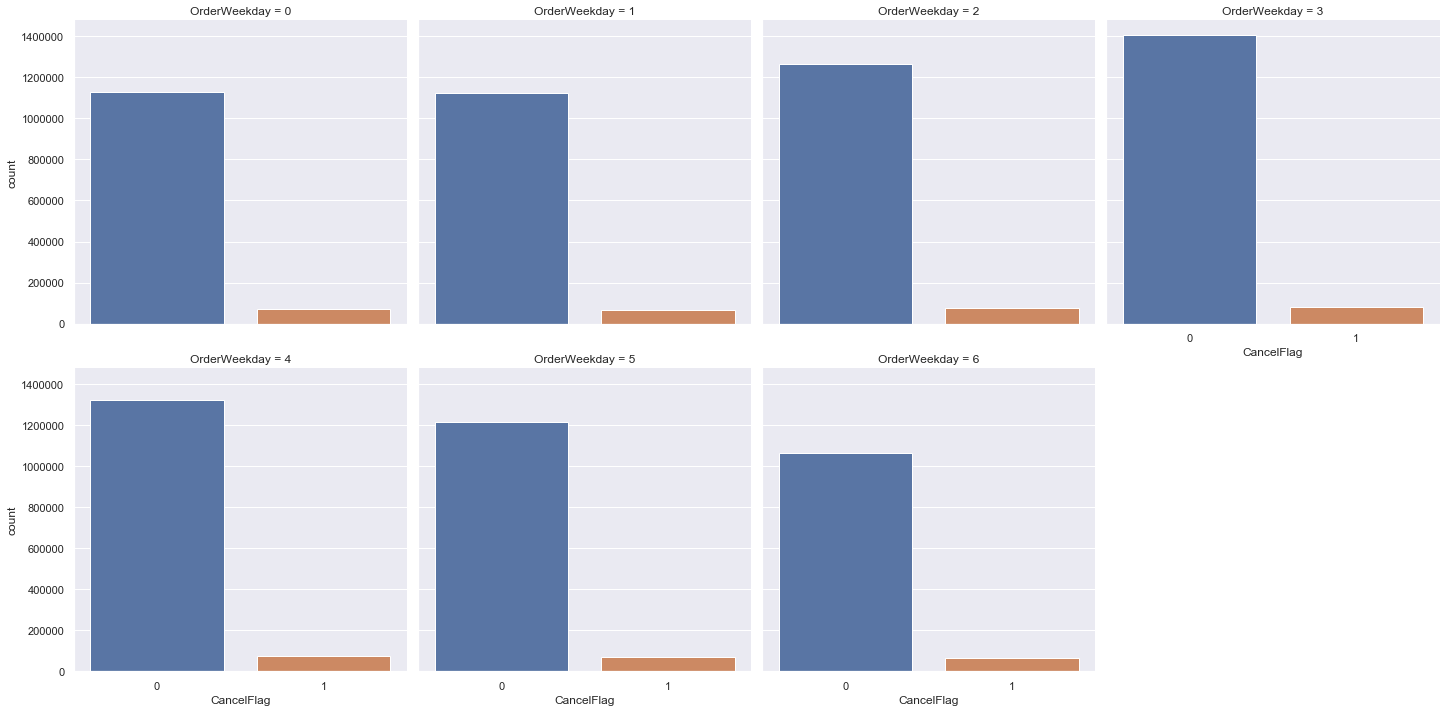

In [25]:
plot_orderweekday_cancel = sns.catplot(x="CancelFlag", col="OrderWeekday", col_wrap=4, data=df, kind="count")

In [26]:
df['DeliveryWeekday'] = df['Date'].dt.dayofweek

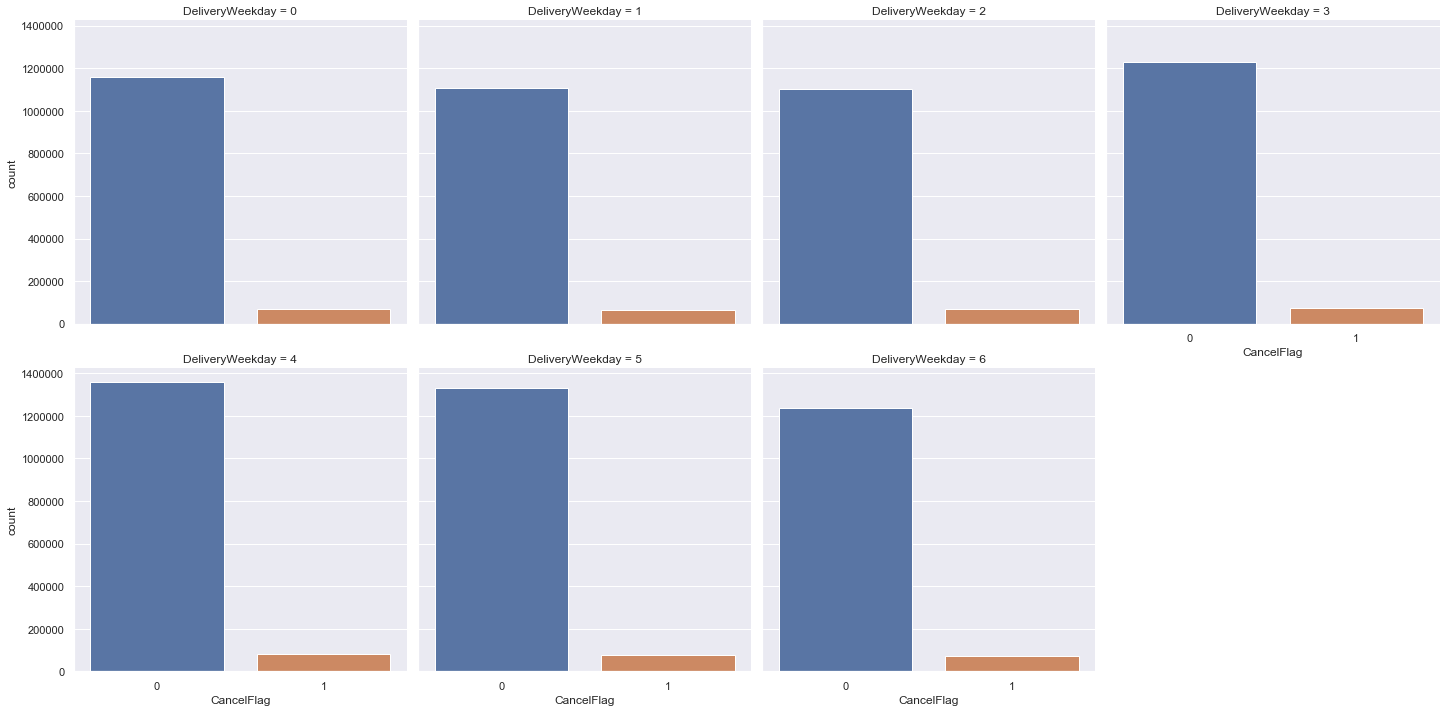

In [27]:
plot_deliveryweekday_cancel = sns.catplot(x="CancelFlag", col="DeliveryWeekday", col_wrap=4, data=df, kind="count")

No dependence on the day of the week for placed and delivered order is observed.

In [28]:
count_dups = list(df.pivot_table(index=['OrderID'], aggfunc='size'))
df.drop_duplicates(subset='OrderID', keep='first', inplace=True)
df['count_dups'] = count_dups

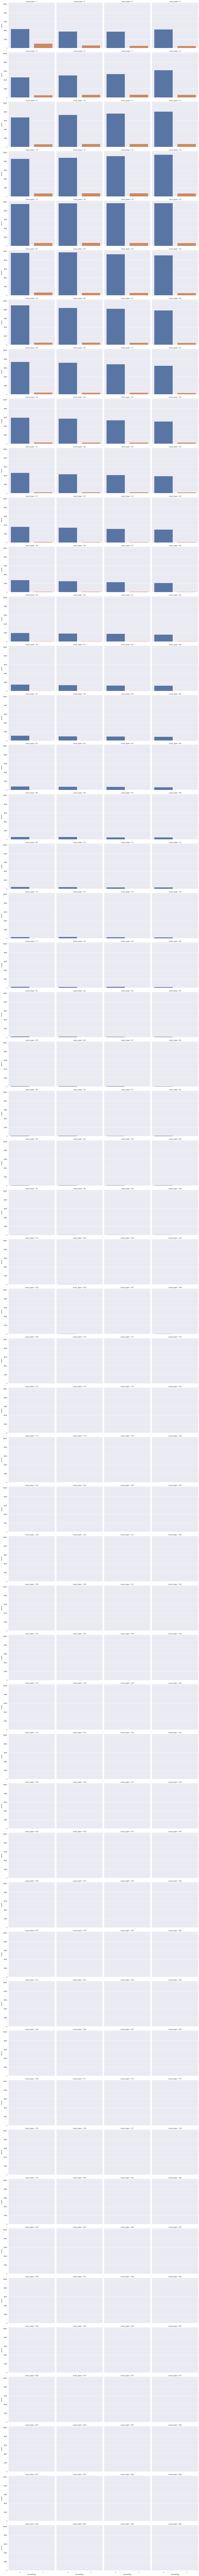

In [29]:
plot_count_dups_cancel = sns.catplot(x="CancelFlag", col="count_dups", col_wrap=4, data=df, kind="count")

As the number of goods in one order increases, the number of refusals decreases.

In [30]:
df['OrderDeliveryWeekday'] = df['OrderWeekday'].astype(str) + '_' + df['DeliveryWeekday'].astype(str)

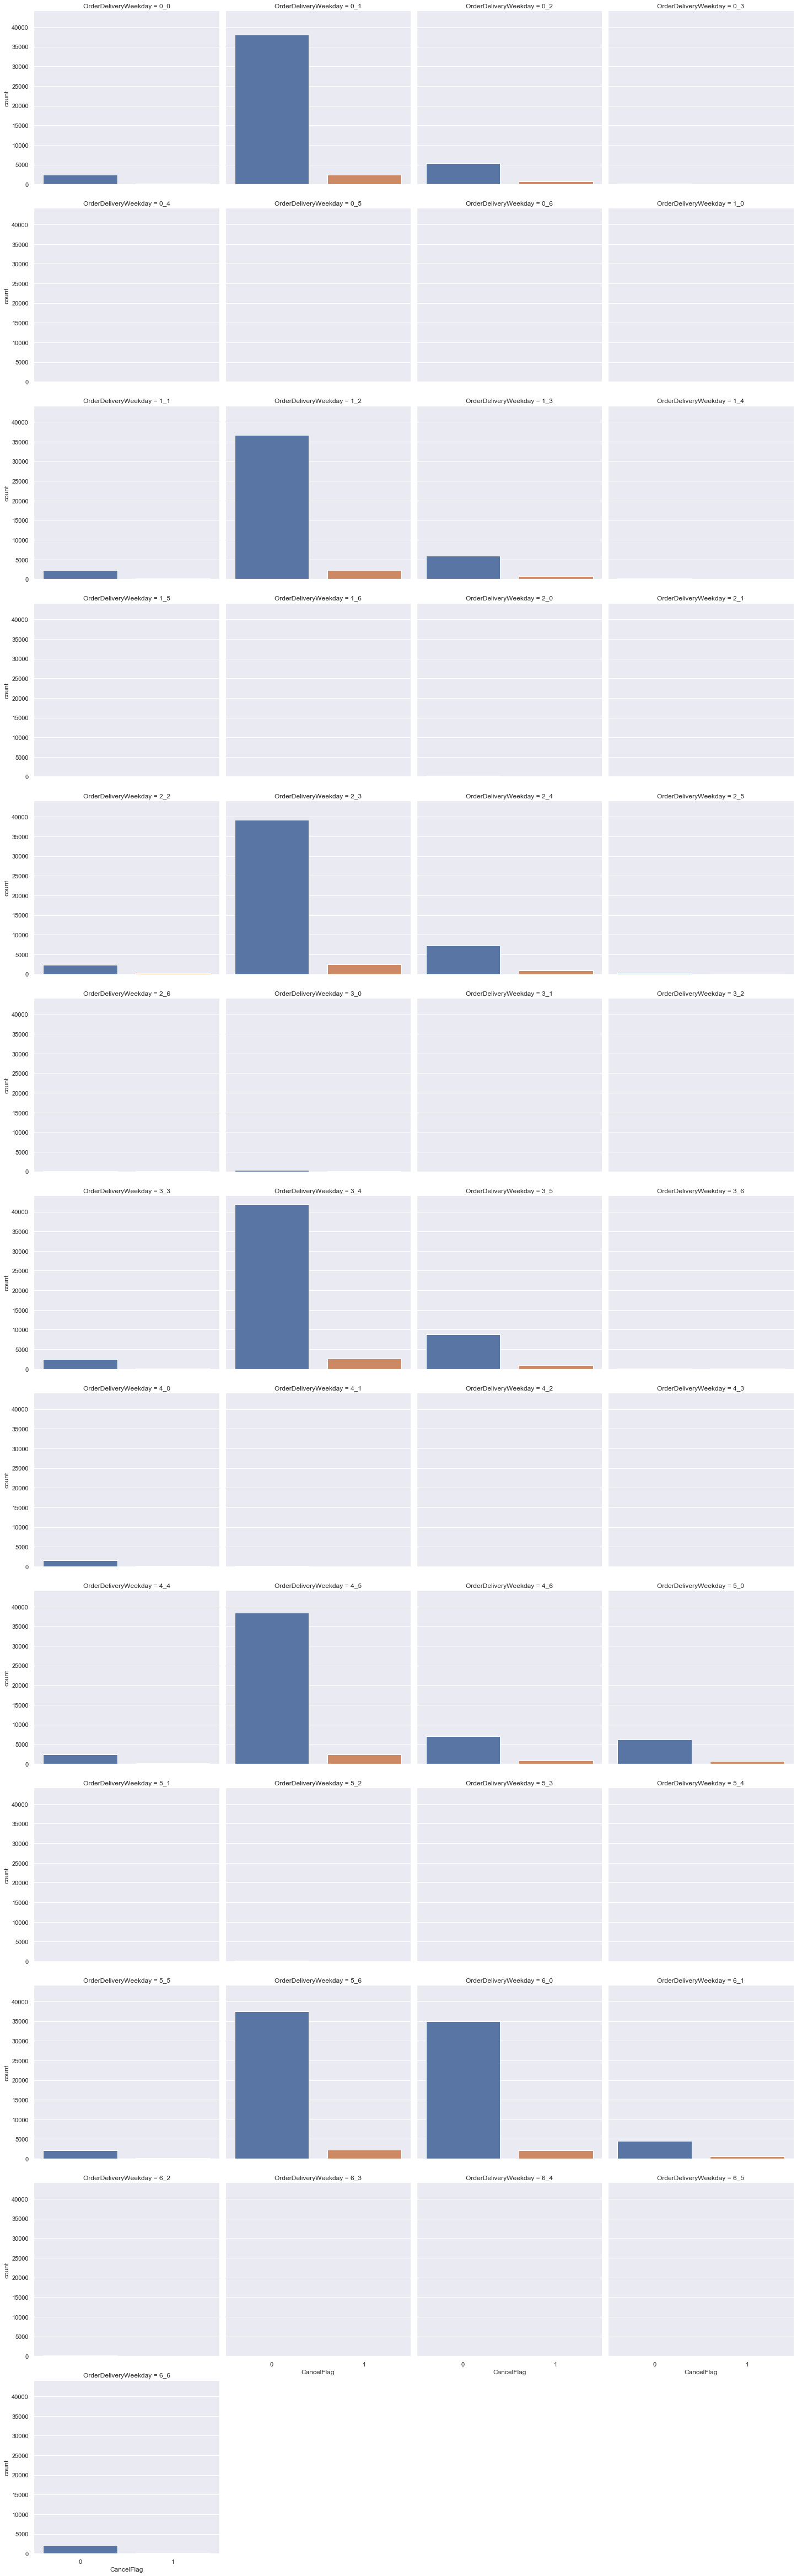

In [31]:
plot_orderdeliveryweekday_cancel = sns.catplot(x="CancelFlag", col="OrderDeliveryWeekday", col_wrap=4, data=df, kind="count")

Seems like most of the cancellations were made the next day after the order was placed. There are no dependencies on a weekday when the order was placed and a delivery weekday.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354851 entries, 0 to 9023136
Data columns (total 21 columns):
Interval                354851 non-null object
Date                    354851 non-null datetime64[ns]
OrderDate               354851 non-null datetime64[ns]
ClientID                354851 non-null int64
ChannelID               354851 non-null int64
OrderID                 354851 non-null int64
MaterialID              354746 non-null float64
GroupID                 354746 non-null float64
Cluster                 132984 non-null object
CancelFlag              354851 non-null int64
OrderCnt                354746 non-null float64
DeliveryType            354851 non-null object
prepay                  354851 non-null int64
count_edit              354851 non-null int64
IntervalFrom            354851 non-null object
IntervalTo              354851 non-null object
DeltaDays               354851 non-null int64
OrderWeekday            354851 non-null int64
DeliveryWeekday         354851 

In [33]:
df['IsStandardDelivery'] = pd.get_dummies(df['DeliveryType'], drop_first=True)

In [34]:
dummy_cluster = pd.get_dummies(df['Cluster'])
df = pd.concat([df, dummy_cluster['HUB5']], axis=1)

In [35]:
df_small = df[['OrderID', 'GroupID', 'OrderCnt']].copy()
df_pivot = pd.pivot_table(df_small, index='OrderID', columns='GroupID', aggfunc=np.sum, fill_value=0)
df = pd.concat([df, df_pivot], axis=1)

In [36]:
df.drop(['OrderID', 'ChannelID', 'Interval', 'Date', 'OrderDate', 'Cluster', 'DeliveryType', 'GroupID', 'ClientID', 'MaterialID', 'OrderWeekday', 'DeliveryWeekday'], axis=1, inplace=True)

In [37]:
dummy_intervalfrom = pd.get_dummies(df['IntervalFrom']).add_prefix('from_')
dummy_intervalto = pd.get_dummies(df['IntervalTo']).add_prefix('to_')
dummy_orderdeliveryweekday = pd.get_dummies(df['OrderDeliveryWeekday'])
df = pd.concat([df, dummy_intervalfrom, dummy_intervalto, dummy_orderdeliveryweekday], axis=1)

In [38]:
df.drop(['IntervalFrom', 'IntervalTo', 'OrderDeliveryWeekday'], axis=1, inplace=True)

In [39]:
df.fillna(value=0, inplace=True)

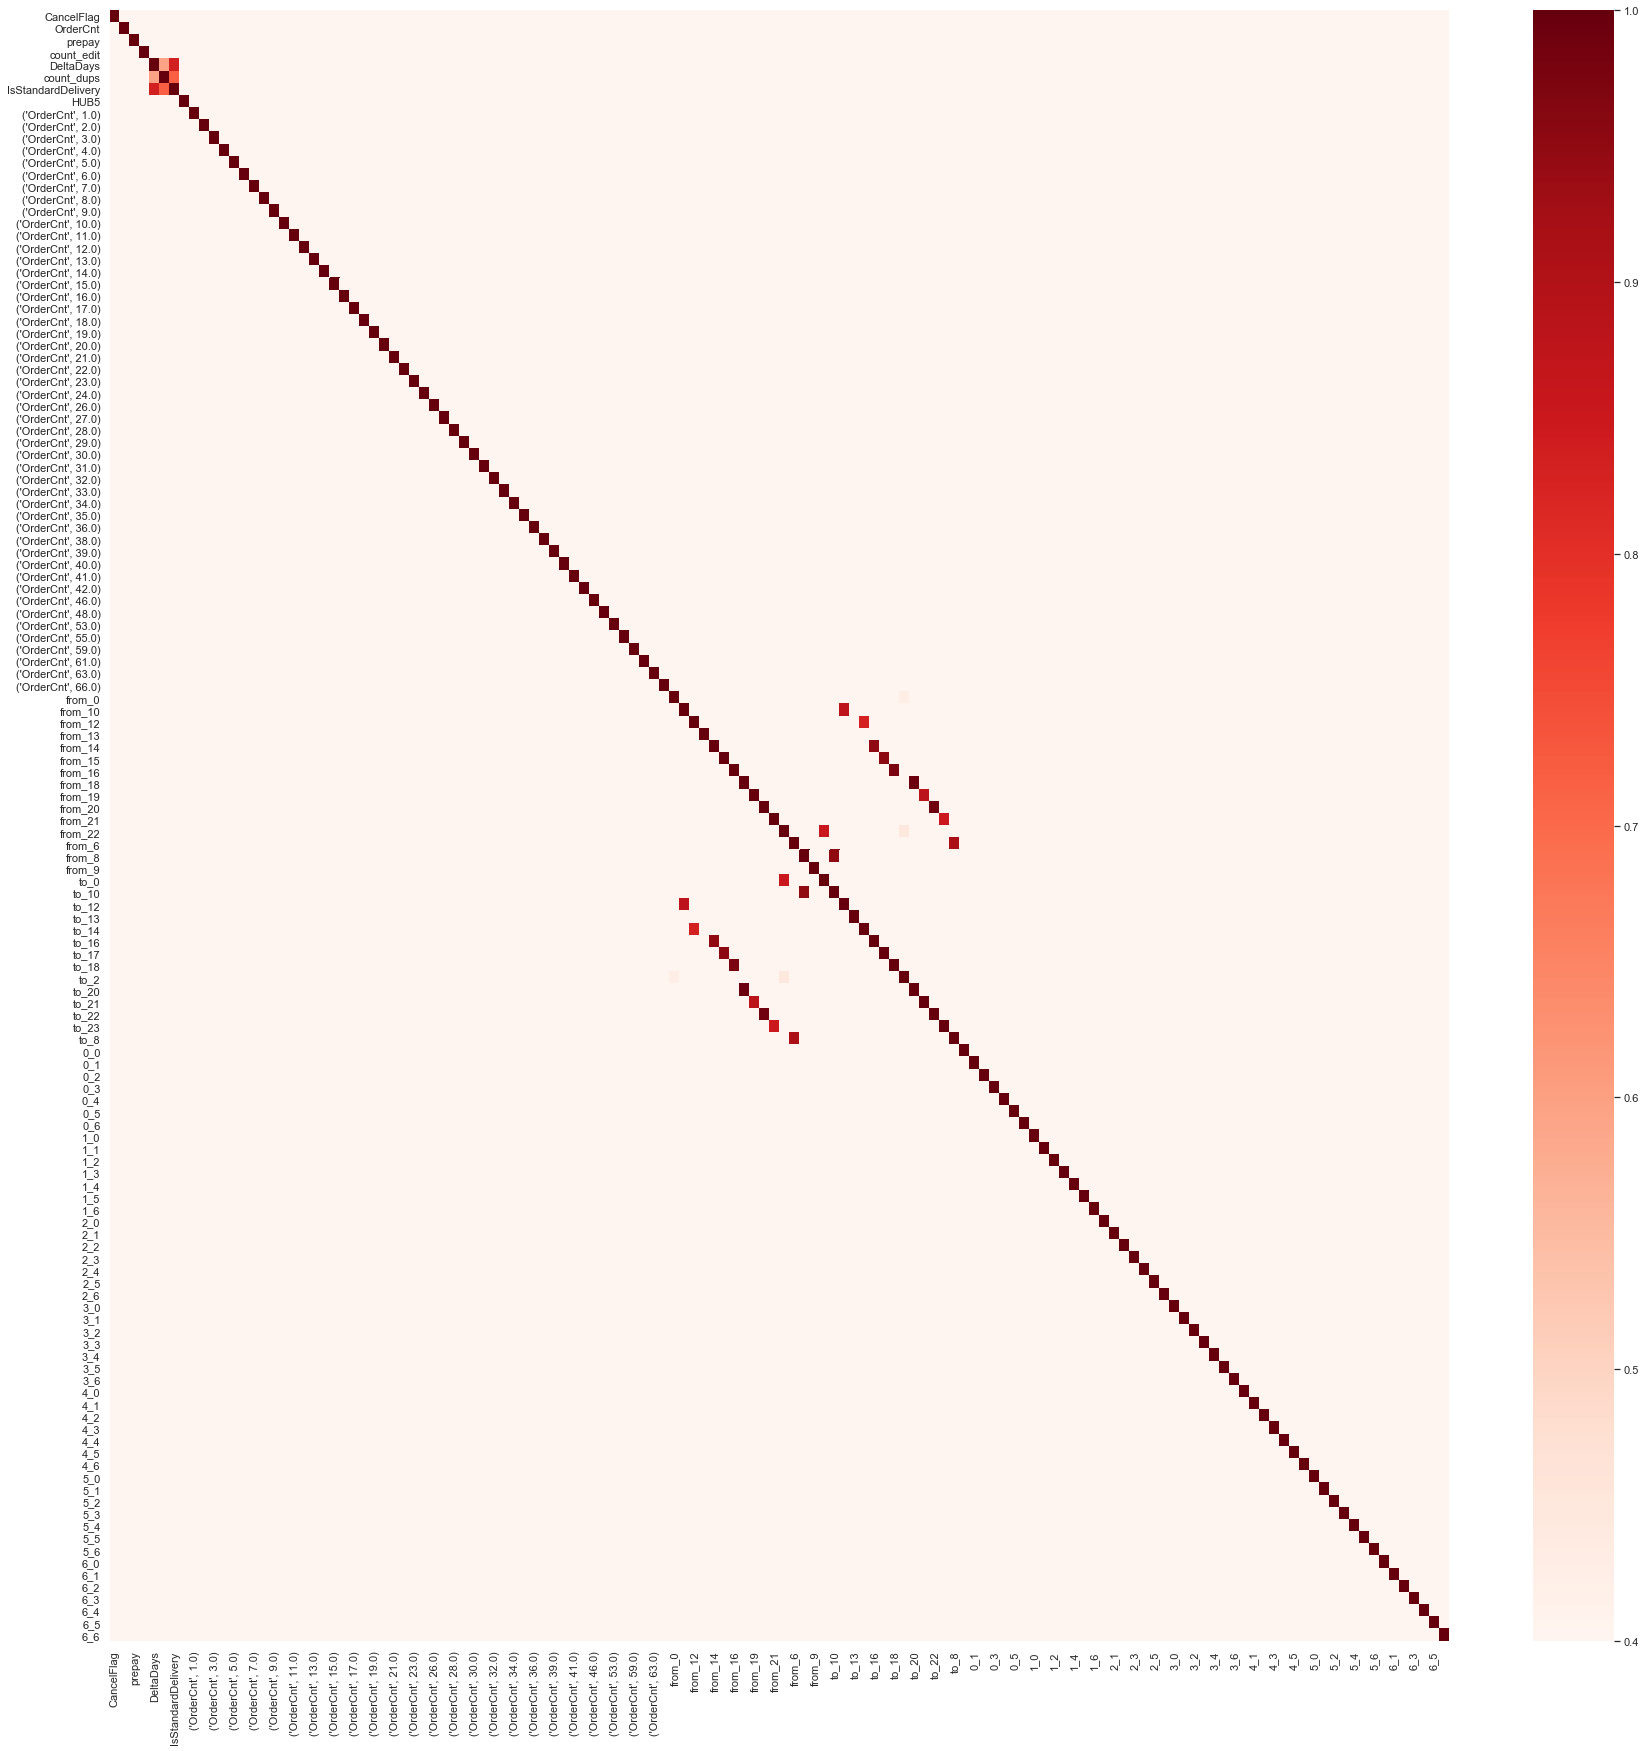

In [40]:
plt.figure(figsize=(30,30))
df_corr = df.corr()
sns.heatmap(df_corr, cmap=plt.cm.Reds, vmin=0.4)
plt.show()

No correlation with target variable **CancelFlag** above 0.4

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df.drop('CancelFlag', axis=1)
y = df['CancelFlag']

In [43]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [44]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0.0: 685821, 1.0: 23776})


In [45]:
ones_cancel = df.loc[df['CancelFlag'] == 1]
zeros_cancel = df.loc[df['CancelFlag'] == 0]
zeros_cancel = zeros_cancel.sample(n = int(ones_cancel.shape[0] * 1))
X_under = pd.concat([ones_cancel, zeros_cancel], axis=0)
X_under = X_under.sample(frac=1).reset_index(drop=True)
y_under = X_under['CancelFlag']
X_under.drop('CancelFlag', axis=1, inplace=True)

In [46]:
print('Resampled dataset shape %s' % Counter(y_under))

Resampled dataset shape Counter({0.0: 23776, 1.0: 23776})


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [48]:
print("X_train:", X_train.shape[0])
print("X_test:", X_test.shape[0])

X_train: 496717
X_test: 212880


## Baseline

In [49]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [50]:
# SVM
# svclassifier = SVC(kernel='linear')
# Logistic regression
log_reg = LogisticRegression()
# LDA
lda_model = LinearDiscriminantAnalysis()

# XGBClassifier
xgb_model = XGBClassifier()

# Random Forest
rand_forest_clf = RandomForestClassifier() # n_jobs=2, random_state=0
# Decision Tree
decis_tree_clf = DecisionTreeClassifier()
# Naive Bayes
gauss_model = GaussianNB()

In [51]:
# SVM
# svclassifier.fit(X_train, y_train)

In [52]:
duplicate_columns = X_train.columns[X_train.columns.duplicated()]
duplicate_columns

Index([], dtype='object')

In [53]:
# Logistic regression
print('Logistic regression')
log_reg.fit(X_train, y_train)

# LDA
print('LDA')
lda_model.fit(X_train, y_train)

# XGBClassifier
print('XGBClassifier')
xgb_model.fit(X_train, y_train)

# Random Forest
print('Random Forest')
rand_forest_clf.fit(X_train, y_train)

# Decision Tree
print('Decision Tree')
decis_tree_clf.fit(X_train, y_train)

# Naive Bayes
print('Naive Bayes')
gauss_model.fit(X_train, y_train)

Logistic regression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LDA
XGBClassifier
Random Forest
Decision Tree
Naive Bayes


GaussianNB()

In [54]:
# y_pred1 = svclassifier.predict(X_test)
y_pred2 = log_reg.predict(X_test)
y_pred3 = lda_model.predict(X_test)
y_pred4 = xgb_model.predict(X_test)
y_pred5 = rand_forest_clf.predict(X_test)
y_pred6 = decis_tree_clf.predict(X_test)
y_pred7 = gauss_model.predict(X_test)

In [55]:
from sklearn.metrics import roc_auc_score

In [56]:
# print('SVM: ', roc_auc_score(y_test, y_pred1))
print('LogReg: ', roc_auc_score(y_test, y_pred2))
print('LDA: ', roc_auc_score(y_test, y_pred3))
print('XGB: ', roc_auc_score(y_test, y_pred4))
print('RandForest: ', roc_auc_score(y_test, y_pred5))
print('DecisTree: ', roc_auc_score(y_test, y_pred6))
print('NaiveBayes: ', roc_auc_score(y_test, y_pred7))

LogReg:  0.5010632236776875
LDA:  0.5268413205014582
XGB:  0.508154766435706
RandForest:  0.5291544009591251
DecisTree:  0.537425052697721
NaiveBayes:  0.7583439855745162


In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

         0.0       1.00      0.52      0.68    205747
         1.0       0.07      1.00      0.13      7133

    accuracy                           0.53    212880
   macro avg       0.53      0.76      0.40    212880
weighted avg       0.97      0.53      0.66    212880



In [59]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_test.ravel(), y_pred7, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0.0     1.0     All
True                             
0.0        106307   99440  205747
1.0             0    7133    7133
All        106307  106573  212880
